# The Sparks Foundation - GRIP
## Data Science and Business Analytics

## Exploratory Data Analysis - Retail
##     by Shashank Raghupatro



### Objectives

+ Perform EDA on the dataset "SampleSuperstore"
+ Find out weak areas where we need to work in order to increase profit.
+ What business problems do you encounter on exploring the data? What is your approach to solve them?

### Importing necessary packages

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting

### Download the data

We can use the SampleSuperstore dataset which is already uploaded by Aakash Kothare.

We need to download the data from the CSV file into a pandas dataframe to be able to work on it.

In [2]:
df = pd.read_csv('../input/tsf-datasets/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Preparation and Cleaning

In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

we can see that no columns have null values, thus the data is already clean.

In [6]:
df.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Perform Exploratory Analysis

We can analyse the following columns to gain inferences about the data, and to understand how to increase sales.

+ Ship Mode
+ Segment
+ State
+ Category
+ Sales
+ Discount
+ Profit

### Ship Mode

Text(0.5, 1.0, 'Shipping Modes')

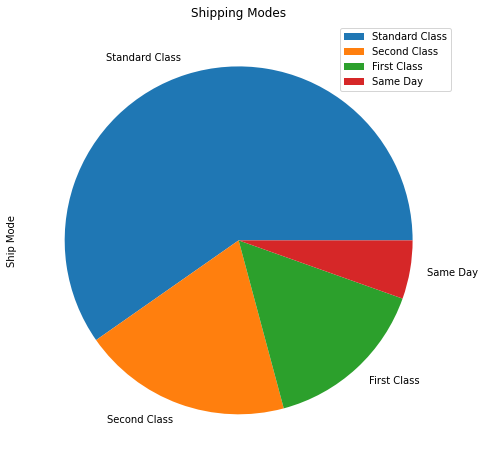

In [7]:
df['Ship Mode'].value_counts().plot(kind='pie',figsize=(8,8))
plt.legend()
plt.title('Shipping Modes')

**From the above pie chart, we can infer that most customers prefer Standard Shipping.**

**This tells us that we should focus on improving the delivery times for standard shipping in order to improve overall customer experience which will in turn increase sales.**

### Segment

Text(0.5, 1.0, 'Segment')

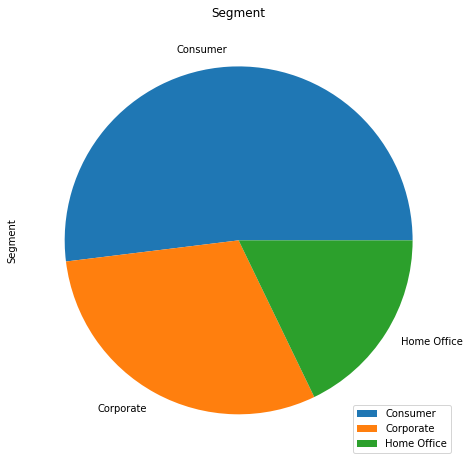

In [8]:
df['Segment'].value_counts().plot(kind='pie',figsize=(8,8))
plt.legend()
plt.title('Segment')

**The above pie chart shows us that almost half of our entire customers are from the consumer segment.**

**As we know that the Corporate Segment has a higher spending capacity than the avverage consumer, we should be targetting ads towards the corporate segment inorder to increase the amount of purchases made by them, in order to increase overall revenue.**

### State wise Profit

In [9]:
df.groupby(['State']).sum()['Profit'].sort_values(ascending = False)

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

In [10]:
state_wise_profit = pd.DataFrame(df.groupby(['State']).sum()['Profit'].sort_values(ascending = False))
state_wise_profit[-10:]

,Profit
State,
Oregon,-1190.4705
Florida,-3399.3017
Arizona,-3427.9246
Tennessee,-5341.6936
Colorado,-6527.8579
North Carolina,-7490.9122
Illinois,-12607.8870
Pennsylvania,-15559.9603
Ohio,-16971.3766


Text(0.5, 1.0, 'State-wise Profits')

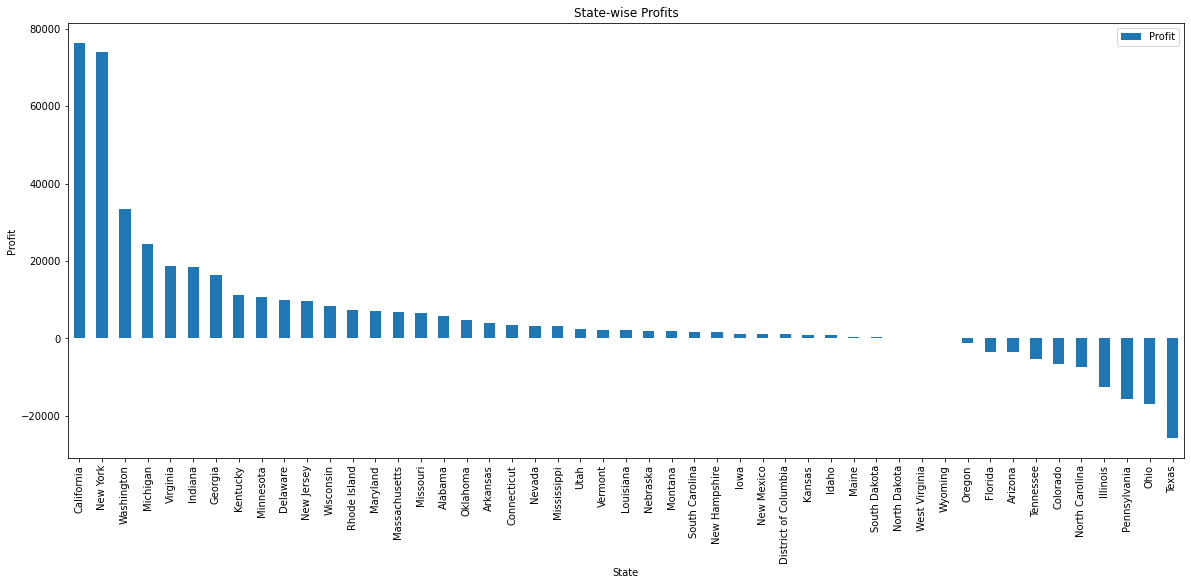

In [11]:
state_wise_profit.plot(kind='bar',figsize=(20,8))
plt.legend()
plt.ylabel('Profit')
plt.title('State-wise Profits')

**From the above chart we can see that some cities generate high profit, while some cities causes loss for the business**

Text(0.5, 1.0, 'Worst performing states')

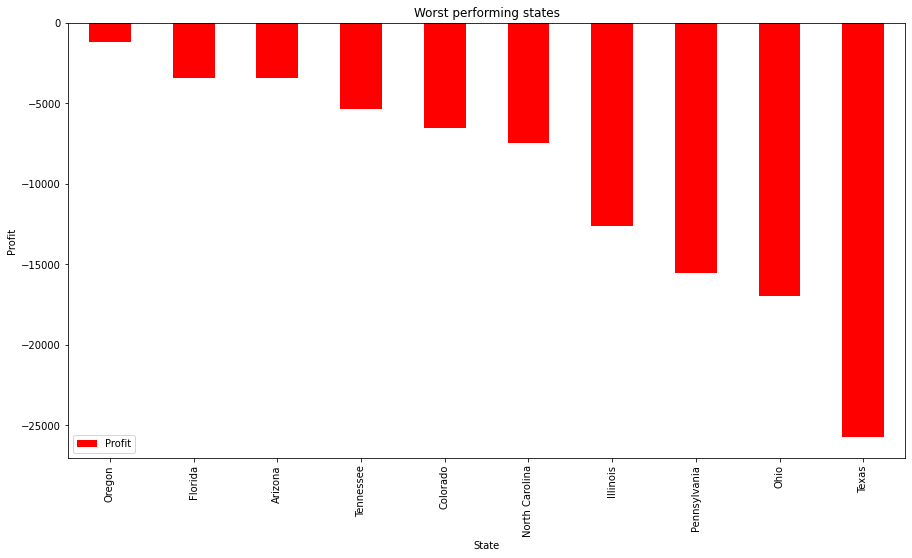

In [12]:
state_wise_profit[-10:].plot(kind='bar',figsize=(15,8),color='r')
plt.ylabel('Profit')
plt.title('Worst performing states')

**We should take a serious look into the operations related to these top 10 worst performing cities, and either eliminate the problem or stop sales in these states as they only cause losses to the business.**

### Category wise Sales vs Profit

In [13]:
category_wise_profit = pd.DataFrame(df.groupby('Category').sum()['Profit'])
category_wise_sales = pd.DataFrame(df.groupby('Category').sum()['Sales'])
profit_vs_sales = pd.concat([category_wise_profit, category_wise_sales], axis=1)

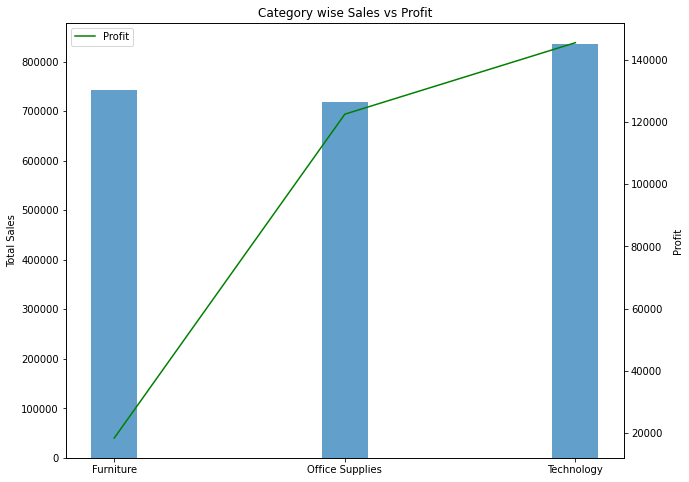

In [14]:
fig = plt.figure(figsize=(10,8))
ax1=plt.subplot(1,1,1)
ax2=ax1.twinx()
ax1.bar(profit_vs_sales.index,profit_vs_sales.Sales,width=0.2,label='Quantity',alpha=0.7)
ax2.plot(profit_vs_sales.index,profit_vs_sales.Profit,color='g',label='Profit')
ax1.set_ylabel('Total Sales')
ax2.set_ylabel('Profit')
plt.title('Category wise Sales vs Profit')
plt.legend()

**We can see that the most profitable category is Technology, also we have the most sales from this category.**

**The total sales vs profit ratio is maximum for Furniture, we need to either increase the margin in order to increase the profit per dollar of sale, or we need to lower our furniture inventory and invest in tech inventory.**

### Discount

Text(0.5, 1.0, 'Discounts on Products')

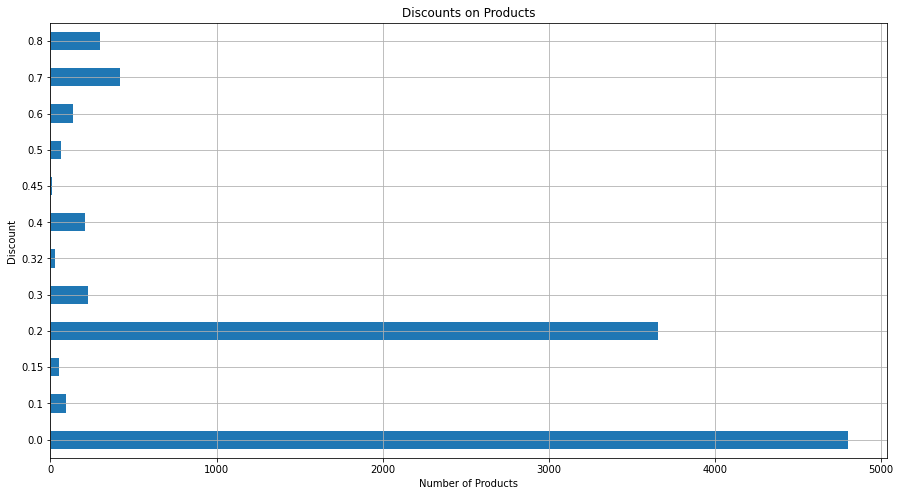

In [15]:
df.groupby('Discount').count()['Sales'].plot(kind='barh',figsize=(15,8))
plt.ylabel('Discount')
plt.xlabel('Number of Products')
plt.grid()
plt.title('Discounts on Products')

**We can observe that the maximum number of products sold have no discount on their price, followed by produucts haveing 20% discount**

### Profit

Text(0.5, 1.0, 'Profit for each Sub-Category')

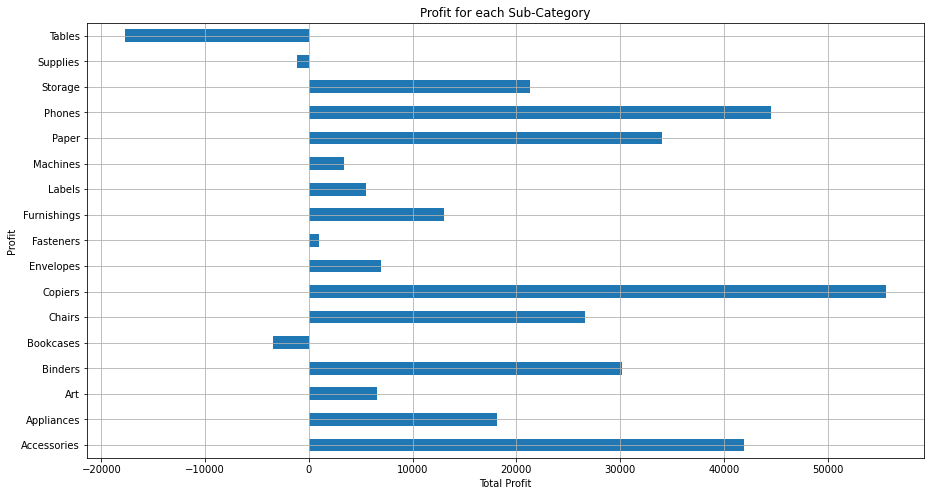

In [16]:
df.groupby('Sub-Category').sum()['Profit'].plot(kind='barh',figsize=(15,8))
plt.ylabel('Profit')
plt.xlabel('Total Profit')
plt.grid()
plt.title('Profit for each Sub-Category')

**We can see that the Sub-Categories "Tables","Supplies", and "Bookcases" causes us an overall loss, so we should either increase the profit margin or drop selling these products altogether.**

**Sale of Copiers provide us the most profit, followed by Phones and their Accessories.**

# Thank You